# 8. Дискретные распределения

In [16]:
import numpy as np
from scipy.stats import randint 

### РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ

Равномерное распределение — это распределение вероятностей, в качестве значений которого могут выступать любые целые числа от  до , а вероятности их появления одинаковы.

 Попробуем рассчитать вероятности для случайной величины, которая принимает значения от 1 включительно до 7 не включительно (собственно, это как раз пример с пирожными):

In [17]:
x = np.arange(1, 7)
disc_uni_dist = randint(1,7)
pmf = disc_uni_dist.pmf(x)
print(pmf)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


Также мы можем найти кумулятивную вероятность для распределения, то есть для каждого  вероятность того, что случайная величина примет значение  или меньше:

In [18]:
cdf = disc_uni_dist.cdf(x)
print(cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


?  
Вы участвуете в розыгрыше бесплатного места на новый курс по Data Science. Вы знаете, что участников 250.  
  
Какова вероятность, что на курс попадёт кто-то из первых пятидесяти зарегистрировавшихся?

In [19]:
x = np.arange(1, 251)
disc_uni_dist = randint(1,251)
cdf = disc_uni_dist.cdf(x)
print(cdf[49])

0.2


### РАСПРЕДЕЛЕНИЕ БЕРНУЛЛИ

Распределение Бернулли, по сути, моделирует однократное подбрасывание «фальшивой» монеты. Это распределение вероятностей случайной величины, принимающей только два значения: 1 («успех») и 0 («неудача») с вероятностями  и  соответственно. Таким образом, распределение Бернулли описывает события, имеющие ровно два исхода. Такие события повсеместно встречаются в реальной жизни (выиграет команда чемпионат или нет, сдаст студент экзамен или провалит его, распознает алгоритм объект на фото или нет).

?  
Вы стреляете по мишени в тире. Вероятность попасть составляет . В случае успеха вы выиграете плюшевого медведя стоимостью 3000 рублей, а в случае промаха — не выиграете ничего. У вас есть только один выстрел.
  
Какой должна быть стоимость билета, чтобы игра была честной, то есть чтобы цена билета равнялась ожидаемому выигрышу, а значит, не уводила в убыток продавца или вас при большом количестве выстрелов?

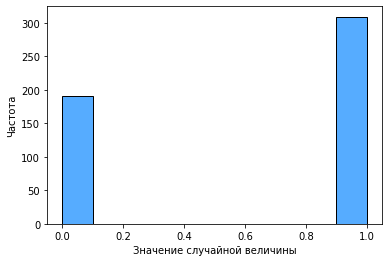

In [23]:
# С помощью специальной функции Python можно смоделировать распределение Бернулли и, например, 
# увидеть ожидаемое соотношение попаданий и промахов для решённой задачи, если будет сделано 500 выстрелов:
import seaborn as sns
from scipy.stats import bernoulli

data = bernoulli.rvs(size=500,p=0.6)
ax = sns.histplot(data,
                  kde = False,
                  color='dodgerblue');
ax.set(xlabel='Значение случайной величины', ylabel='Частота');

In [26]:
# Также можно вывести количество неудач и попаданий в нашей модели:
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 191]
 [  1 309]]


### БИНОМИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Биномиальным называют распределение, при котором возможны только два исхода (успех или неудача, выигрыш или проигрыш) и вероятность успеха и неудачи одинакова для всех испытаний. Однако исходы не обязательно должны быть равновероятными, и каждое испытание не зависит от других.

In [28]:
import scipy 
scipy.stats.binom.pmf(8,10,0.8)+scipy.stats.binom.pmf(9,10,0.8)+scipy.stats.binom.pmf(10,10,0.8)

0.6777995264000004

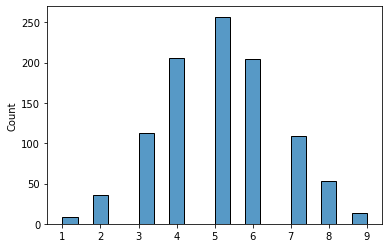

In [36]:
from scipy import random
import matplotlib.pyplot as plt
x = random.binomial(n=10, p=0.5, size=10)

sns.histplot(random.binomial(n=10, p=0.5, size=1000), kde=False)

plt.show();

### РАСПРЕДЕЛЕНИЕ ПУАССОНА

Распределение Пуассона — это дискретное распределение вероятностей числа событий, происходящих в данный период времени, с учётом среднего количества раз, когда событие происходит за этот период времени.

In [33]:
scipy.stats.distributions.poisson.pmf(5, 4.5)

0.17082685848611215

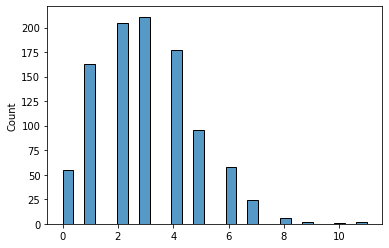

In [35]:
sns.histplot(random.poisson(lam=3, size=1000), kde=False)

plt.show();

In [43]:
# 8.7
# Пассажиры прибывают на вокзал со средней скоростью 4 человека в минуту.

# Если количество пассажиров, приезжающих на вокзал, подчиняется распределению Пуассона, 
# какова приблизительная вероятность того, что 16 пассажиров приедут на вокзал в конкретный четырёхминутный период? 
# Округлите ответ до трёх знаков после точки-разделителя.

scipy.stats.distributions.poisson.pmf(16, 16)

0.09921753162215541

# 9. Непрерывные распределения

### РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ

Мы можем с помощью Python смоделировать случайную величину c таким распределением и визуализировать плотность её распределения. К примеру, сформируем выборку объёмом 10000 для распределения с параметрами a=10 и b=40:

/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_66082/1769813117.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


[Text(0.5, 0, 'Равномерное распределение'), Text(0, 0.5, 'Плотность')]

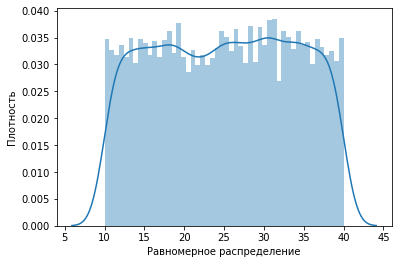

In [46]:
from scipy.stats import uniform
data = uniform.rvs(size=10000, loc = 10, scale=30)
ax = sns.distplot(data,
                  bins=50)
ax.set(xlabel='Равномерное распределение', ylabel='Плотность')

### НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Давайте смоделируем нормальное распределение с математическим ожиданием, равным 5, и стандартным отклонением, равным 4, и посмотрим, какой вид оно примет.

/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_66082/2452947486.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


[Text(0.5, 0, 'Нормальное распределение'), Text(0, 0.5, 'Плотность')]

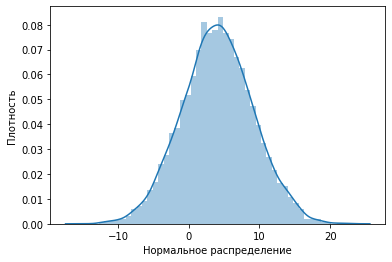

In [47]:
from scipy.stats import norm

data = norm.rvs(size=10000,loc=4,scale=5)
 
ax = sns.distplot(data,
                  bins=50)
ax.set(xlabel='Нормальное распределение', ylabel='Плотность')

#### стандартное нормальное

In [48]:
# С помощью Python мы можем стандартизировать данные следующим образом:

from numpy import asarray
from sklearn.preprocessing import StandardScaler
data = asarray([[93, 44],
                [4, 2],
                [36, 1],
                [14, 29],
                [78, 21]])
print(data)
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)

[[93 44]
 [ 4  2]
 [36  1]
 [14 29]
 [78 21]]
[[ 1.37243726  1.50201177]
 [-1.17229016 -1.06239857]
 [-0.25733199 -1.12345596]
 [-0.88636573  0.58615094]
 [ 0.94355062  0.09769182]]


### ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_66082/249213995.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


[Text(0.5, 0, 'Экспоненциальное распределение'), Text(0, 0.5, 'Плотность')]

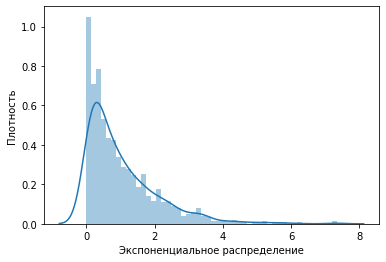

In [49]:
# С помощью Python мы можем смоделировать экспоненциальное распределение так:
from scipy.stats import expon

data = expon.rvs(scale=1,loc=0,size=1000)
ax = sns.distplot(data,
                  bins=50)
ax.set(xlabel='Экспоненциальное распределение', ylabel='Плотность')

In [53]:
# 9.4
# В среднем новый холодильник служит 10 лет. Предположим, что продолжительность времени службы распределена экспоненциально.

# Ответы округлите до трёх знаков после точки-разделителя.

# 1. Какова вероятность того, что холодильник прослужит более 7 лет?
import math
m = 10 
l = 0.1
x = 7

def p(l,x):
    p = 1- math.exp(-l*x)
    return p

print(1-p(l,x))

# 2. Какова вероятность того, что устройство прослужит от 9 до 11 лет?

x1 = 9
x2 = 11
p1 = p(l,x1)
p2 = p(l,x2)
print(p2-p1)

0.4965853037914094
0.07369857604251961
